# Stacking cutouts

In many instances it is useful to stack source cutouts, for instance when searching for detections in bands bluewards of the Lyman-alpha break in high-redshift photometric galaxy samples which potentially host large amounts of contamination. We will look at two examples of this in this notebook. In example 1, we will generate a `Stacked_Band_Cutout` for F444W from all EPOCHS selected galaxies in the JOF NIRCam only catalogue. In examples 2 and 3, we will produce `Multiple_Band_Cutout` and `Stacked_RGB` objects respectively for the same sample.

To start off with though, we need to first produce our galaxy sample following the standard procedures explored in previous notebooks.

In [1]:
# imports
import astropy.units as u
from galfind import EAZY, Catalogue, EPOCHS_Selector, Stacked_Band_Cutout
from galfind.Data import morgan_version_to_dir

Reading GALFIND config file from: /nvme/scratch/work/austind/GALFIND/galfind/../configs/galfind_config.ini


Failed to `import dust_attenuation`
Install from the repo with $ pip install git+https://github.com/karllark/dust_attenuation.git


In [2]:
survey = "JOF"
version = "v11"
instrument_names = ["NIRCam"]
aper_diams = [0.32] * u.arcsec
forced_phot_band = ["F277W", "F356W", "F444W"]
min_flux_pc_err = 10.
SED_fit_params_arr = [
    {"templates": "fsps_larson", "lowz_zmax": 4.0},
    {"templates": "fsps_larson", "lowz_zmax": 6.0},
    {"templates": "fsps_larson", "lowz_zmax": None}
]

JOF_cat = Catalogue.pipeline(
    survey,
    version,
    instrument_names = instrument_names, 
    version_to_dir_dict = morgan_version_to_dir,
    aper_diams = aper_diams,
    forced_phot_band = forced_phot_band,
    min_flux_pc_err = min_flux_pc_err
)
# load sextractor half-light radii
JOF_cat.load_sextractor_Re()

# load EAZY SED fitting results
for SED_fit_params in SED_fit_params_arr:
    EAZY_fitter = EAZY(SED_fit_params)
    EAZY_fitter(JOF_cat, aper_diams[0], load_PDFs = True, load_SEDs = True, update = True)

print(JOF_cat)

INFO:galfind:Loaded aper_diams=<Quantity [0.32] arcsec> for F277W+F356W+F444W
INFO:galfind:Combined mask for NIRCam/F277W+F356W+F444W already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_auto.fits
Calculating depths:   0%|          | 0/15 [00:00<?, ?it/s]
INFO:galfind:Calculated/loaded depths for JOF v11 NIRCam
INFO:galfind:Local depth columns already exist in /raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/NIRCam/JOF/(0.32)as/JOF_MASTER_Sel-F277W+F356W+F444W_v11.fits
INFO:galfind:Loaded 'has_data_mask' from /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/has_data_mask/JOF_MASTER_Sel-F277W+F356W+F444W_v11.h5
INFO:galfind:Making JOF v11 JOF_MASTER_Sel-F277W+F356W+F444W_v11 catalogue!
INFO:galfind:Made /raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/NIRCam/JOF/(0.32)as/JOF_MASTER_Sel-F277W+F356W+F444W_v11.fits catalogue!
INFO:galfind:Loaded FLUX_RADIUS from /raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/NIRCam/JOF/(0.3

Running SED fitting took 0.1s


INFO:galfind:Loading EAZY_fsps_larson property PDFs into JOF v11 NIRCam


Loading properties and associated errors took 1.3s


Constructing redshift PDFs: 100%|██████████| 16335/16335 [00:00<00:00, 77277.62it/s]
INFO:galfind:Finished loading EAZY_fsps_larson property PDFs into JOF v11 NIRCam
INFO:galfind:Loading EAZY_fsps_larson SEDs into JOF v11 NIRCam
Constructing SEDs: 100%|██████████| 16335/16335 [00:01<00:00, 14842.82it/s]
INFO:galfind:Finished loading EAZY_fsps_larson SEDs into JOF v11 NIRCam
INFO:galfind:Updating SED results in galfind catalogue object
Updating galaxy SED results: 100%|██████████| 16335/16335 [00:00<00:00, 173888.43it/s]
INFO:galfind:Making .in file for EAZY_fsps_larson_zmax=6.0 SED fitting for JOF v11 NIRCam
INFO:galfind:Made .in file for EAZY_fsps_larson_zmax=6.0 SED fitting for JOF v11 NIRCam. 


Running SED fitting took 0.1s


INFO:galfind:Loading EAZY_fsps_larson property PDFs into JOF v11 NIRCam


Loading properties and associated errors took 0.9s


Constructing redshift PDFs: 100%|██████████| 16335/16335 [00:00<00:00, 22352.11it/s]
INFO:galfind:Finished loading EAZY_fsps_larson property PDFs into JOF v11 NIRCam
INFO:galfind:Loading EAZY_fsps_larson SEDs into JOF v11 NIRCam
Constructing SEDs: 100%|██████████| 16335/16335 [00:01<00:00, 14887.14it/s]
INFO:galfind:Finished loading EAZY_fsps_larson SEDs into JOF v11 NIRCam
INFO:galfind:Updating SED results in galfind catalogue object
Updating galaxy SED results: 100%|██████████| 16335/16335 [00:00<00:00, 136083.49it/s]
INFO:galfind:Making .in file for EAZY_fsps_larson_zfree SED fitting for JOF v11 NIRCam
INFO:galfind:Made .in file for EAZY_fsps_larson_zfree SED fitting for JOF v11 NIRCam. 


Running SED fitting took 0.1s


INFO:galfind:Loading EAZY_fsps_larson property PDFs into JOF v11 NIRCam


Loading properties and associated errors took 1.5s


Constructing redshift PDFs: 100%|██████████| 16335/16335 [00:00<00:00, 69439.52it/s]
INFO:galfind:Finished loading EAZY_fsps_larson property PDFs into JOF v11 NIRCam
INFO:galfind:Loading EAZY_fsps_larson SEDs into JOF v11 NIRCam
Constructing SEDs: 100%|██████████| 16335/16335 [00:01<00:00, 9907.19it/s] 
INFO:galfind:Finished loading EAZY_fsps_larson SEDs into JOF v11 NIRCam
INFO:galfind:Updating SED results in galfind catalogue object
Updating galaxy SED results: 100%|██████████| 16335/16335 [00:00<00:00, 175009.98it/s]


****************************************
CATALOGUE(JOF,v11,NIRCam):
----------
CAT PATH = /raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/NIRCam/JOF/(0.32)as/JOF_MASTER_Sel-F277W+F356W+F444W_v11.fits
TOTAL GALAXIES = 16335
RA RANGE = [53.01070689 53.11059594] deg
DEC RANGE = [-27.91226173 -27.83206063] deg
----------
****************************************
MULTIPLE_FILTER
----------
FACILITY: JWST
INSTRUMENT: NIRCam
FILTERS: ['F090W', 'F115W', 'F150W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W', 'F300M', 'F335M', 'F356W', 'F410M', 'F444W']
****************************************



In [3]:
# perform EPOCHS selection
epochs_selector = EPOCHS_Selector(allow_lowz = False, unmasked_instruments = "NIRCam")
EPOCHS_JOF_cat = epochs_selector(JOF_cat, aper_diams[0], EAZY_fitter, return_copy = True)

Selecting bluewards_Lya_SNR<2.0_EAZY_fsps_larson_zfree_0.32as:   0%|          | 0/16335 [00:00<?, ?it/s]

Selecting bluewards_Lya_SNR<2.0_EAZY_fsps_larson_zfree_0.32as: 100%|██████████| 16335/16335 [00:00<00:00, 105163.24it/s]
Selecting redwards_Lya_SNR>5.0,5.0_widebands_EAZY_fsps_larson_zfree_0.32as: 100%|██████████| 16335/16335 [00:00<00:00, 42236.30it/s]
Selecting ALL_redwards_Lya_SNR>2.0_EAZY_fsps_larson_zfree_0.32as: 100%|██████████| 16335/16335 [00:00<00:00, 90587.50it/s]
Selecting red_chi_sq<3.0_EAZY_fsps_larson_zfree_0.32as: 100%|██████████| 16335/16335 [00:00<00:00, 83641.84it/s]
Selecting chi_sq_diff>4.0,dz>0.5_EAZY_fsps_larson_zfree_0.32as: 100%|██████████| 16335/16335 [00:00<00:00, 99156.63it/s]
Selecting zPDF>60%,|dz|/z<0.1_EAZY_fsps_larson_zfree_0.32as: 100%|██████████| 16335/16335 [00:00<00:00, 98133.77it/s]
Selecting sex_Re_F277W+F356W+F444W>45.0mas: 100%|██████████| 16335/16335 [00:00<00:00, 495716.41it/s]
Selecting EPOCHS_NIRCam_EAZY_fsps_larson_zfree_0.32as: 100%|██████████| 16335/16335 [00:00<00:00, 126207.39it/s]


## Example 1: Catalogue stacking in a single band

In this example, we will perform an inverse variance weighted stack of the F444W cutouts for every galaxy within the (NIRCam) EPOCHS JOF sample. The easiest way to do this from a `Catalogue` object is via the `from_cat()` class method.

In [4]:
stacked_F444W_EPOCHS_JOF = Stacked_Band_Cutout.from_cat(
    EPOCHS_JOF_cat,
    "F444W",
    0.96 * u.arcsec,
    overwrite = True
)

Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'.
INFO:galfind:Created cutout for SCI in F444W
INFO:galfind:Created cutout for SEG in F444W
INFO:galfind:Created cutout for RMS_ERR in F444W
INFO:galfind:Created cutout for WHT in F444W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/data/288.fits


INFO:galfind:Created cutout for SCI in F444W
INFO:galfind:Created cutout for SEG in F444W
INFO:galfind:Created cutout for RMS_ERR in F444W
INFO:galfind:Created cutout for WHT in F444W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/data/568.fits
INFO:galfind:Created cutout for SCI in F444W
INFO:galfind:Created cutout for SEG in F444W
INFO:galfind:Created cutout for RMS_ERR in F444W
INFO:galfind:Created cutout for WHT in F444W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/data/710.fits
INFO:galfind:Created cutout for SCI in F444W
INFO:galfind:Created cutout for SEG in F444W
INFO:galfind:Created cutout for RMS_ERR in F444W
INFO:galfind:Created cutout for WHT in F444W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/data/718.fits
INFO:galfind:Created cutout for SCI in F444W
INFO:galfind:Created cutout for SEG in F444W
INFO

Let's now have a look at what the `__str__` statement looks for this object.

In [5]:
print(stacked_F444W_EPOCHS_JOF)

****************************************
STACKED_BAND_CUTOUT(EPOCHS_NIRCam_EAZY_fsps_larson_zfree_0.32as,F444W,0.96as):
****************************************
Cutout path: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/data/EPOCHS_NIRCam_EAZY_fsps_larson_zfree_0.32as.fits
Meta:
----------
SIMPLE: True
BITPIX: 8
NAXIS: 0
EXTEND: True
ID: EPOCHS_NIRCam_EAZY_fsps_larson_zfree_0.32as
SURVEYS_VERSIONS: JOF,v11
N_CUTOUTS: 81
FILT: F444W
ZP: 28.086519392283982
SIZE_AS: 0.96
SIZE_PIX: 32.0
****************************************



Since the `Stacked_Band_Cutout` object also inherits the plotting functionality of `Band_Cutout_Base`, we can plot the resulting cutout in exactly the same way as in example 1 of the [single band cutouts notebook](single_band_cutouts.ipynb). Let's have a look at what we get then shall we?

INFO:galfind:Saved png cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/png/EPOCHS_NIRCam_EAZY_fsps_larson_zfree_0.32as.png


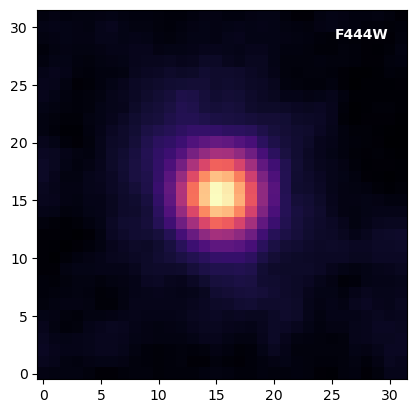

In [6]:
stacked_F444W_EPOCHS_JOF.plot(plot_type = "SCI")

Just the same as in the [single band cutout notebook](single_band_cutouts.ipynb), we can also create a `Multiple_Band_Cutout` object, which will accept a list of `Stacked_Band_Cutout` objects as well `Band_Cutout` objects as seen before. To instantiate this object, we will use the `Multiple_Band_Cutout.from_cat()` class method.

In [7]:
from galfind import Multiple_Band_Cutout
EPOCHS_JOF_stacked_cutouts = Multiple_Band_Cutout.from_cat(EPOCHS_JOF_cat, 0.96 * u.arcsec, overwrite = False)

print(EPOCHS_JOF_stacked_cutouts)

INFO:galfind:Already made fits cutout for JOF v11 288 F090W
INFO:galfind:Already made fits cutout for JOF v11 568 F090W
INFO:galfind:Already made fits cutout for JOF v11 710 F090W
INFO:galfind:Already made fits cutout for JOF v11 718 F090W
INFO:galfind:Already made fits cutout for JOF v11 885 F090W
INFO:galfind:Already made fits cutout for JOF v11 946 F090W
INFO:galfind:Already made fits cutout for JOF v11 1669 F090W
INFO:galfind:Already made fits cutout for JOF v11 1676 F090W
INFO:galfind:Already made fits cutout for JOF v11 2162 F090W
INFO:galfind:Already made fits cutout for JOF v11 2248 F090W
INFO:galfind:Already made fits cutout for JOF v11 2799 F090W
INFO:galfind:Already made fits cutout for JOF v11 2839 F090W
INFO:galfind:Already made fits cutout for JOF v11 2875 F090W
INFO:galfind:Already made fits cutout for JOF v11 3004 F090W
INFO:galfind:Already made fits cutout for JOF v11 3219 F090W


INFO:galfind:Already made fits cutout for JOF v11 3397 F090W
INFO:galfind:Already made fits cutout for JOF v11 3642 F090W
INFO:galfind:Already made fits cutout for JOF v11 3830 F090W
INFO:galfind:Already made fits cutout for JOF v11 3898 F090W
INFO:galfind:Already made fits cutout for JOF v11 4023 F090W
INFO:galfind:Already made fits cutout for JOF v11 4047 F090W
INFO:galfind:Already made fits cutout for JOF v11 4087 F090W
INFO:galfind:Already made fits cutout for JOF v11 4094 F090W
INFO:galfind:Already made fits cutout for JOF v11 4134 F090W
INFO:galfind:Already made fits cutout for JOF v11 4270 F090W
INFO:galfind:Already made fits cutout for JOF v11 4276 F090W
INFO:galfind:Already made fits cutout for JOF v11 4305 F090W
INFO:galfind:Already made fits cutout for JOF v11 4805 F090W
INFO:galfind:Already made fits cutout for JOF v11 5376 F090W
INFO:galfind:Already made fits cutout for JOF v11 5553 F090W
INFO:galfind:Already made fits cutout for JOF v11 5625 F090W
INFO:galfind:Already mad

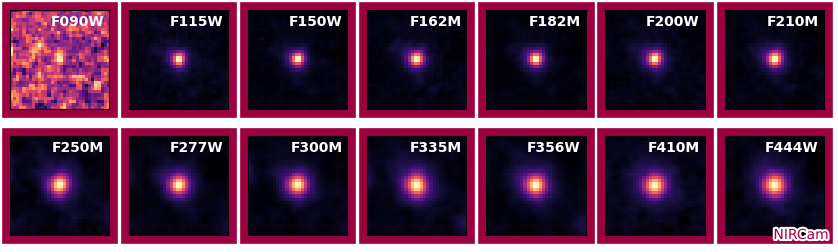

In [13]:
EPOCHS_JOF_stacked_cutouts.plot(n_rows = 2, split_by_instr = True, imshow_kwargs={"norm": "linear"})

Here we see a detection in F090W, which is partly down to the Lyman break falling halfway through this filter in a large portion of our EPOCHS sample. The increase in size of the stacked cutout towards redder wavelengths is likely indicative of the increasing PSF size. To perform any accurate morphological measurements from these cutouts it is vitally important that these are appropriately PSF homogenized. See the [PSF homogenization notebook](../data/PSF_homogenization.ipynb) for more details.

## Example 2: Producing stacked RGBs

In [9]:
from galfind import Stacked_RGB

rgb_bands = {"B": "F090W", "G": "F200W", "R": "F444W"}
EPOCHS_JOF_stacked_RGB = Stacked_RGB.from_cat(EPOCHS_JOF_cat, rgb_bands, 0.96 * u.arcsec, overwrite = True)

print(EPOCHS_JOF_stacked_RGB)

Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'.
INFO:galfind:Created cutout for SCI in F090W
INFO:galfind:Created cutout for SEG in F090W
INFO:galfind:Created cutout for RMS_ERR in F090W
INFO:galfind:Created cutout for WHT in F090W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F090W/data/288.fits
INFO:galfind:Created cutout for SCI in F090W
INFO:galfind:Created cutout for SEG in F090W
INFO:galfind:Created cutout for RMS_ERR in F090W
INFO:galfind:Created cutout for WHT in F090W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F090W/data/568.fits
INFO:galfind:Created cutout for SCI in F090W
INFO:galfind:Created cutout for SEG in F090W
INFO:galfind:Created cutout for RMS_ERR in F090W
INFO:galfind:Created cutout for WHT in F0

INFO:galfind:Created cutout for RMS_ERR in F090W
INFO:galfind:Created cutout for WHT in F090W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F090W/data/718.fits
INFO:galfind:Created cutout for SCI in F090W
INFO:galfind:Created cutout for SEG in F090W
INFO:galfind:Created cutout for RMS_ERR in F090W
INFO:galfind:Created cutout for WHT in F090W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F090W/data/885.fits
INFO:galfind:Created cutout for SCI in F090W
INFO:galfind:Created cutout for SEG in F090W
INFO:galfind:Created cutout for RMS_ERR in F090W
INFO:galfind:Created cutout for WHT in F090W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F090W/data/946.fits
INFO:galfind:Created cutout for SCI in F090W
INFO:galfind:Created cutout for SEG in F090W
INFO:galfind:Created cutout for RMS_ERR in F090W
INFO:galfind:Created cutout for WHT in F090W


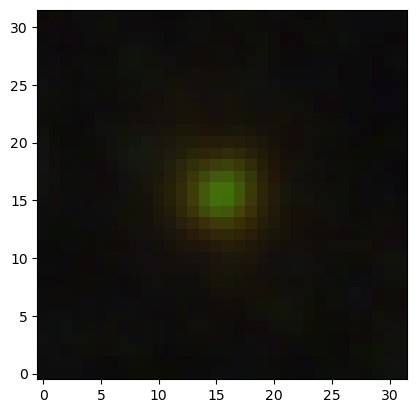

In [10]:
EPOCHS_JOF_stacked_RGB.plot()